# Problem Statement

We need to predict the percentage scores of an student based on the number of hours the student studies.

### Task
Also, We need to tell what will be predicted score if a student studies for 9.25 hrs/ day?

# Available Dataset

<a href='http://bit.ly/w-data'> student_scores.csv </a>

## Solution

### Identifying the Problem Nature

There are only two variables and we have to predict the relationship between the dependent and independent variable. So we will first have a look at the data available. We will use Python's **Pandas** and **matplotlib** module for that.

In [25]:
# Importing required modules 

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [26]:
# Reading data from remote url
student_data = pd.read_csv("http://bit.ly/w-data")

# Total Data items
print("Student Data has " + str(len(student_data)) + " rows.")  

# Display student_data
student_data.head(5)

Student Data has 25 rows.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualising Student Data 

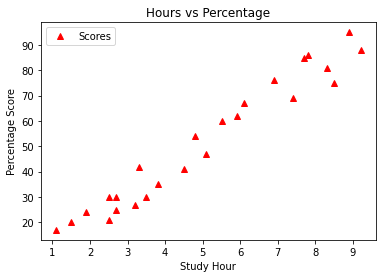

In [52]:
%matplotlib inline

# Using matplotlib 

student_data.plot(x='Hours', y='Scores', style='r^')  
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hour')  
plt.ylabel('Percentage Score')
plt.show()

Visualising the data provide us the insight that the two variables are **linearly** realted in a positive way. So, we can use **Simple Linear Regression** to design a solution for this Regression problem as Simple linear regression is used to estimate the relationship between two quantitative variables.

### **Train/Test Data Preparation**

For training and testing our Linear Regression model, we need to divide the data into "attributes" (inputs) and "labels" (outputs).

In [54]:
# Storing Study Hours ('Input/Attributes') Values in np Array
X = student_data['Hours'].values

# Storing Scores(Labels) Values in np Array
y = student_data['Scores'].values

# Reshaping Array from 1-D to 2-D for training ahead
X = X.reshape(len(student_data), 1)

### Train/Test Data Split

In [48]:
# Spliting data into training and test sets using Scikit-Learn Module

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Training Linear Regression Model

In [46]:
# Training our model using sklearn and training data
from sklearn.linear_model import LinearRegression  

reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Model Trained Successfully.")

Model Trained Successfully.


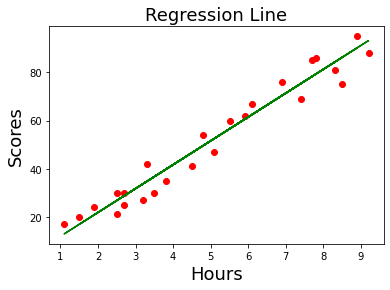

In [71]:
# Plotting the Linear Regression line

m = reg.coef_
b = reg.intercept_

# Equation of Line
line = m*X+b

# Plotting for the test data

plt.xlabel('Hours',fontsize=18)
plt.ylabel('Scores',fontsize=18)
plt.title('Regression Line',fontsize=18)
plt.scatter(X, y,color='red')
plt.plot(X, line,color='green')
plt.show()

### Testing Linear Regression Model

In [75]:
# Testing data - In Hours
print('Study Hours in Test Data\n')
print(X_test) 

# Predicting the scores
y_pred = reg.predict(X_test)

Study Hours in Test Data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [77]:
# Comparing Actual vs Predicted

com_df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
com_df

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Accuracy of the model

To compare how well different algorithms perform on a particular dataset, sklearn provide different metrics for accuracy and errors. Here, we have chosen the **Mean Square Error**.

In [93]:
from sklearn import metrics

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


### Predicting Output Scores where Student Study hours = 9.25

In [94]:
hours = np.array([[9.25]])
output = reg.predict(hours)

print("Number of Study Hours = {}".format(hours[0,0]))
print("Predicted Score = {}".format(output[0]))

Number of Study Hours = 9.25
Predicted Score = 93.69173248737538
